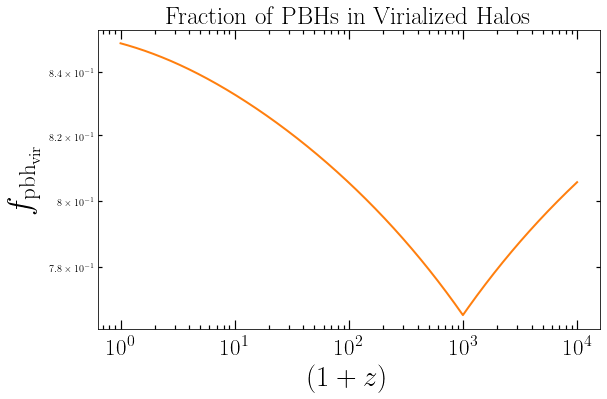

In [10]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker
from PRaccretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


# Using v_L = V_NL (v_P)

delta_c = 1.686  # Critical density for collapse, dimensionless

def v_pbh_linear_regime(z): # in units of pc/yr
    return  v_L_Serpico(z)


# Function to calculate M_2_sigma as a function of redshift
def M2_sigma(z):
    return 1e8 * ((v_pbh_linear_regime(z)/(17 * 1e3 * (yr/pc)))**3) *(((z+1)/10)**(-3/2)) #8.8e12 * np.exp(-1.8 * (z + 1))

# Function to calculate the fraction of PBHs in virialized halos
def f_vir(z):
    def sigma(z):
        return  10.2 - 0.79 * np.log10(M2_sigma(z))
    def nu_min(z):
        return delta_c/sigma(z)
    return 1 - erf(nu_min(z) / np.sqrt(2))


fig,ax = plt.subplots(1, figsize = (9, 5.5))
plt.rc('lines', linewidth = 2)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')

# Redshift range
z = np.geomspace(1e4, 1, 10000)  

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)

plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)


plt.loglog(z, f_vir(z), color='C1')
plt.xlabel('$(1+z)$',  fontsize = 29)
plt.ylabel('$f_{\mathrm{pbh}_\mathrm{vir}}$', fontsize = 33, labelpad = 9)
plt.title('Fraction of PBHs in Virialized Halos', fontsize = 25)
plt.savefig('f_vir.pdf', bbox_inches = 'tight')
plt.show()
